<a href="https://colab.research.google.com/github/Yash22222/OIBSIP/blob/main/ESD_OI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EMAIL-SPAM-DETECTION WITH MACHINE LEARNING

### Import Libraries

In [78]:
import numpy as np
import pandas as pd
import nltk #(natural language tool-kit)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sea
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
df=pd.read_csv("Email_Spam.csv",encoding='latin1' )
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [80]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [81]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
406,ham,All was well until slightly disastrous class t...,NaN,NaN,NaN
2008,ham,See the forwarding message for proof,NaN,NaN,NaN
2190,ham,"Ooh, 4got, i'm gonna start belly dancing in mo...",NaN,NaN,NaN
3764,spam,Someone U know has asked our dating service 2 ...,NaN,NaN,NaN
2921,ham,I've not sent it. He can send me.,NaN,NaN,NaN
1048,ham,I walked an hour 2 c u! doesnåÕt that show I c...,NaN,NaN,NaN
2159,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,NaN,NaN,NaN
5322,ham,"Thanks, I'll keep that in mind",NaN,NaN,NaN
2573,spam,Congrats 2 mobile 3G Videophones R yours. call...,NaN,NaN,NaN
4626,spam,Please call our customer service representativ...,NaN,NaN,NaN


In [82]:
df.shape

(5572, 5)

In [83]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## DATA CLEANING

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [84]:

#Renaming the columns for better understanding

df.rename(columns={'v1':'Variety' , 'v2':'Data'}, inplace=True)

#Renaming columns permanently so "inplace=True"
df.head()

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Labelling in dataset

Variety values either showing 'ham' or "spam" , lets martk them with 0 and 1 respectively

In [85]:
encoder = LabelEncoder()
df['Variety'] = encoder.fit_transform(df['Variety']) #allotting 0,1
df.head()

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Variety     5572 non-null   int64 
 1   Data        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


In [87]:
#from above info we can see that last 3 columns Unnamed:2 , Unnamed: 3 , Unnamed: 4 has a good amount of
#null values , so drop those columns

df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

#dropping columns permanently so "inplace=True"
df.head()

,Variety,Data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [88]:
#check duplicates
df.duplicated().sum()

403

In [89]:
#delete duplicates
df = df.drop_duplicates(keep='first')
df

,Variety,Data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [90]:
df.isnull().sum()

Variety    0
Data       0
dtype: int64

In [91]:
df.sample(10)

,Variety,Data
4480,0,No..its ful of song lyrics..
1705,0,Yun ah.now Ì_ wkg where?btw if Ì_ go nus sc. Ì...
4512,1,Money i have won wining number 946 wot do i do...
5403,0,So gd got free ice cream... I oso wan...
4239,0,The LAY MAN! Just to let you know you are miss...
407,0,Hello! Good week? Fancy a drink or something l...
1183,0,Am i that much bad to avoid like this?
2984,0,No break time one... How... I come out n get m...
3675,0,Hey r Ì_ still online? I've finished the forma...
4469,0,"Lemme know when I can swing by and pick up, I'..."


### After Data Cleaning

In [92]:
df.shape

(5169, 2)

## EDA

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

### Count spam(1) and non-spam(0) mails

In [93]:
df['Variety'].value_counts()

0    4516
1     653
Name: Variety, dtype: int64

In [94]:

#For tokenize the words , need to dowload the 'punkt' module
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Words in each text

In [95]:

df['words'] = df['Data'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words
df.sample(10)

<ipython-input-95-bb7e86a6ed73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df['Data'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words


,Variety,Data,words
3638,0,Wat's da model num of ur phone?,9
883,0,Dude we should go sup again,6
395,0,From here after The performance award is calcu...,17
1790,0,Am not working but am up to eyes in philosophy...,23
4366,0,I like dis sweater fr mango but no more my siz...,15
2132,1,Your B4U voucher w/c 27/03 is MARSMS. Log onto...,25
2596,0,No i'm not gonna be able to. || too late notic...,31
1958,0,"Lol ... Oh no babe, I wont be sliding into you...",21
2780,0,Long after I quit. I get on only like 5 minute...,18
1180,0,I'm in chennai velachery:),7


### Sentences in each mail

In [96]:
df['sentence'] = df['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words
df.sample(10)

<ipython-input-96-0771cdcda79c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'] = df['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words


,Variety,Data,words,sentence
3802,0,Yup song bro. No creative. Neva test quality. ...,17,4
688,0,Thanks love. But am i doing torch or bold.,11,2
4100,1,GSOH? Good with SPAM the ladies?U could b a ma...,36,6
2630,0,No way I'm going back there!,8,1
3618,1,8007 25p 4 Alfie Moon's Children in Need song ...,36,3
389,0,Yup having my lunch buffet now.. U eat already?,11,1
3455,0,Ok. I.ll do you right later.,7,1
2021,0,"I don't have anybody's number, I still haven't...",20,1
1185,0,Annoying isn't it.,5,1
4781,0,"Call me, i am senthil from hsbc.",9,1


### Characters in each text

In [97]:
df['chars']= df['Data'].apply(len)
df.sample(10)

<ipython-input-97-086e64367be4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chars']= df['Data'].apply(len)


,Variety,Data,words,sentence,chars
4822,0,:-) :-),6,1,7
2059,0,He didn't see his shadow. We get an early spri...,13,2,52
599,0,I'm going out to buy mum's present ar.,11,1,38
5420,0,I dont know oh. Hopefully this month.,9,2,37
3185,0,Happy birthday to you....dear.with lots of lov...,10,1,59
4414,0,"Yeah I should be able to, I'll text you when I...",18,1,65
1246,0,"I do know what u mean, is the king of not hav...",27,4,111
4747,0,The beauty of life is in next second.. which h...,30,3,133
2695,0,And whenever you and i see we can still hook u...,13,1,52
2631,1,"URGENT! Your mobile No 077xxx WON a å£2,000 Bo...",31,5,154


### summary of spam mails

In [98]:
df[df['Variety'] == 1][['words','sentence','chars']].describe()

,words,sentence,chars
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


### Statistics summary of Non-Spam mails

In [99]:
df[df['Variety'] == 0][['words','sentence','chars']].describe()

,words,sentence,chars
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


AS WE CAN SEE NON-SPAM MAILS HAVE LARGE NUMBER OF WORDS , CHARACTERS , SENTENCES IN COMPARE TO THE SPAM MAILS. SO THIS IS THE DIFFERENTIATING FACTOR

## HEAT MAP

<ipython-input-100-de8c46037d9d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sea.heatmap(df.corr(), annot=True, cmap="viridis").set(title='Heatmap of Correlated values \n')


[Text(0.5, 1.0, 'Heatmap of Correlated values \n')]

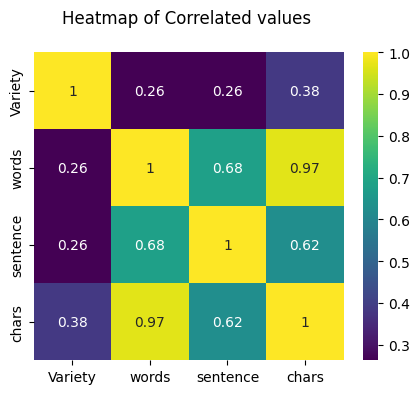

In [100]:
fig, ax = plt.subplots(figsize = (5, 4))
sea.heatmap(df.corr(), annot=True, cmap="viridis").set(title='Heatmap of Correlated values \n')


## GRAPHICAL REPRESENTATION OF THE MAILS

### FOR WORDS

<Figure size 800x500 with 0 Axes>

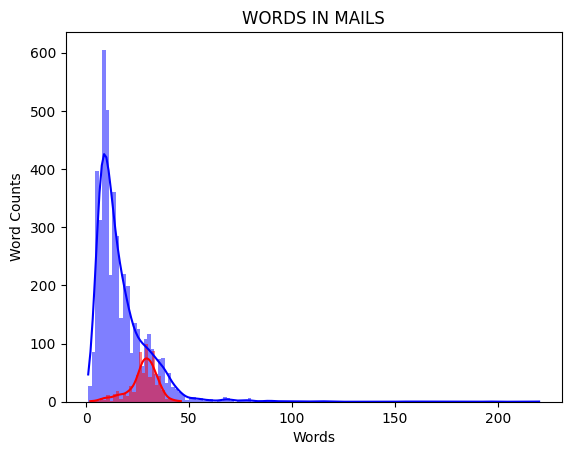

In [101]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['words'], color="blue", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['words'], color="red", kde=True, stat="count", linewidth=0 ,ax = ax)
ax.set_ylabel("Word Counts")
ax.set_xlabel( "Words")
ax.set_title( "WORDS IN MAILS")
plt.show()

### FOR CHARACTERS

<Figure size 800x500 with 0 Axes>

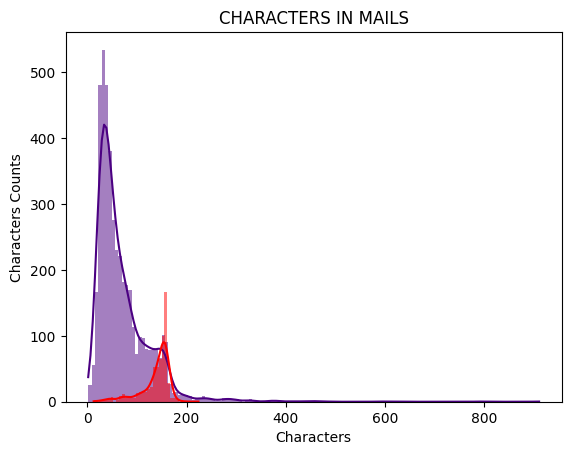

In [102]:

plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['chars'], color="indigo", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['chars'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Characters Counts")
ax.set_xlabel( "Characters")
ax.set_title( "CHARACTERS IN MAILS")
plt.show()

### FOR SENTENCES

<Figure size 800x500 with 0 Axes>

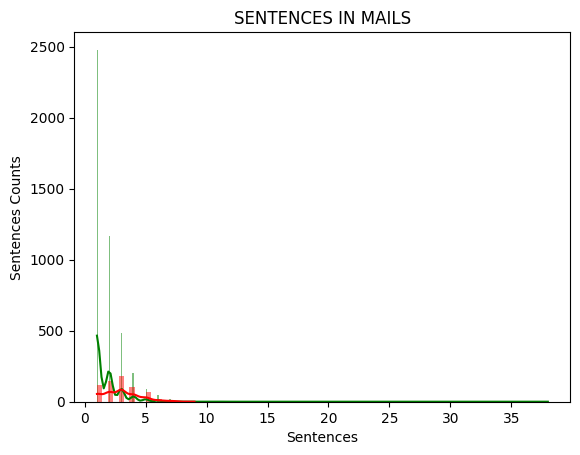

In [103]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['sentence'], color="green", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['sentence'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Sentences Counts")
ax.set_xlabel( "Sentences")
ax.set_title( "SENTENCES IN MAILS")
plt.show()

## Pairplot

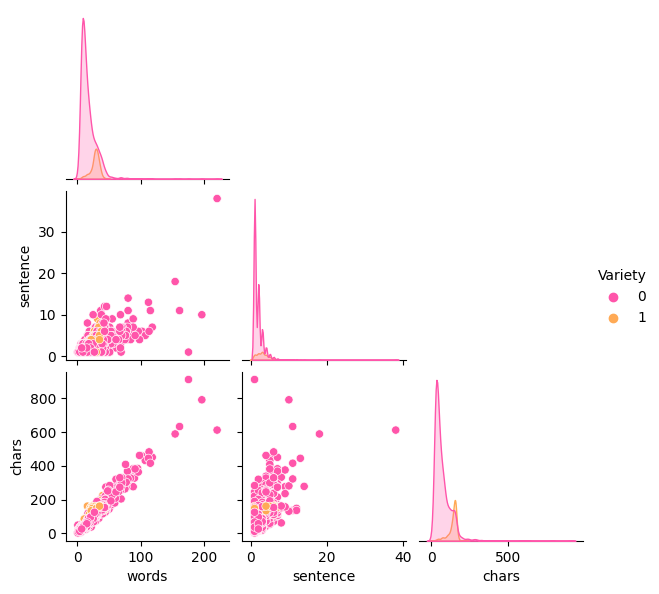

In [104]:
sea.pairplot(df,hue='Variety',corner=True,height=2,palette='spring');


## DATASET GAVING TOTAL OF SPAM AND NON-SPAM MAILS USING PIE CHART



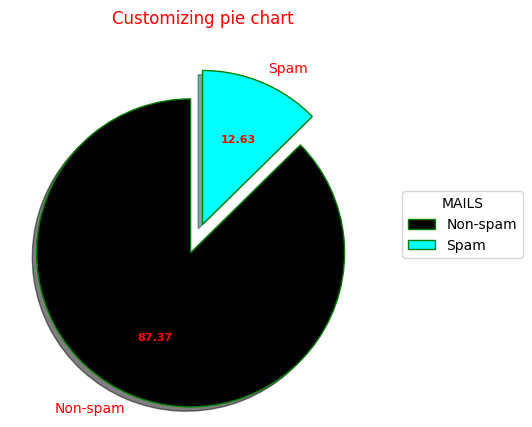

In [105]:
fig, ax = plt.subplots(figsize =(5, 5))
#labels
m=['Non-spam','Spam']
#title for chart
ax.set_title("Customizing pie chart",color="red")
# Creating color parameters
colors = ( "black", "cyan")
# Creating explode data
explode = (0.2, 0.0)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(df['Variety'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
# Adding legend
ax.legend(wedges,m,
          title ="MAILS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")

plt.show()
